In [5]:
import numpy as np
from numpy.linalg import inv, norm

def power_method(A, max_iter=1000, tol=1e-10):
    """
    使用幂法求矩阵的最大模特征值及其对应的特征向量
    """
    n = A.shape[0]
    x = np.random.randn(n)
    x = x / norm(x)
    
    lambda_old = 0
    
    for _ in range(max_iter):
        # 幂法迭代
        y = A @ x

        lambda_new = (x.T @ A @ x) / (x.T @ x)
        # 归一化
        x_new = y / norm(y)
        
        if abs(lambda_new - lambda_old) < tol:
            return lambda_new, x_new
        
        x = x_new
        lambda_old = lambda_new
    
    return lambda_new, x_new

def inverse_power_method(A, sigma, max_iter=1000, tol=1e-10):
    """
    使用反幂法求接近σ的特征值及其对应的特征向量
    """
    n = A.shape[0]
    # 构造位移矩阵
    I = np.eye(n)
    A_shifted = A - sigma * I
    
    x = np.random.randn(n)
    x = x / norm(x)
    
    lambda_old = 0
    
    for _ in range(max_iter):
        y = np.linalg.solve(A_shifted, x)
        lambda_new = (x.T @ A @ x) / (x.T @ x)
        x_new = y / norm(y)
        
        if abs(lambda_new - lambda_old) < tol:
            return lambda_new, x_new
        
        x = x_new
        lambda_old = lambda_new
    
    return lambda_new, x_new

def generate_random_matrices(n, seed=42):
    """生成随机矩阵X和D"""
    np.random.seed(seed)
    X = np.random.randn(n, n)
    D = np.diag(np.sort(np.random.randn(n))[::-1])  # 从大到小排列
    return X, D

def solve_problem1(X, D):
    """解决第(1)问: A = XDX^(-1)"""
    A = X @ D @ inv(X)
    
    # 使用幂法求所有特征值和特征向量
    eigenvalues = []
    eigenvectors = []
    A_deflated = A.copy()
    
    for i in range(A.shape[0]):
        # 使用幂法求最大模特征值
        eigenvalue, eigenvector = power_method(A_deflated)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # 缩减矩阵（deflation）
        u = eigenvector.reshape(-1, 1)
        v = u.T @ A_deflated
        A_deflated = A_deflated - u @ v
    
    return {
        'A': A,
        'eigenvalues': np.array(eigenvalues),
        'eigenvectors': np.column_stack(eigenvectors)
    }

def solve_problem2(X, D1, D2):
    """解决第(2)问: A = X diag(D̃₁, D̃₂)X^(-1)"""
    D_tilde1 = D1 + D2
    D_tilde2 = -D1 - D2
    D_combined = np.diag([D_tilde1, D_tilde2])
    
    A = X @ D_combined @ inv(X)
    
    # 使用幂法求最大模特征值
    eigenvalue, eigenvector = power_method(A)
    
    return {
        'A': A,
        'max_eigenvalue': eigenvalue,
        'max_eigenvector': eigenvector
    }

def solve_problem3(X, D1, D2):
    """解决第(3)问: A = X diag(D̃₁, D̃₂)X^(-1)，涉及复数"""
    D_tilde1 = D1 + 1j*D2
    D_tilde2 = D1 - 1j*D2
    D_combined = np.diag([D_tilde1, D_tilde2])
    
    A = X @ D_combined @ inv(X)
    
    # 使用幂法求最大模特征值
    eigenvalue, eigenvector = power_method(A)
    
    return {
        'A': A,
        'max_eigenvalue': eigenvalue,
        'max_eigenvector': eigenvector
    }

# 设置矩阵维度
n = 2

# 生成随机矩阵
X, D = generate_random_matrices(n)
D1, D2 = D[0,0], D[1,1]

print("原始矩阵:")
print("X =")
print(X)
print("\nD =")
print(D)

# 解决第(1)问
print("\n问题(1)的结果:")
result1 = solve_problem1(X, D)
print("矩阵A =")
print(result1['A'])
print("特征值:")
print(result1['eigenvalues'])
print("特征向量:")
print(result1['eigenvectors'])

# 解决第(2)问
print("\n问题(2)的结果:")
result2 = solve_problem2(X, D1, D2)
print("矩阵A =")
print(result2['A'])
print("最大模特征值:", result2['max_eigenvalue'])
print("对应的特征向量:", result2['max_eigenvector'])

# 解决第(3)问
print("\n问题(3)的结果:")
result3 = solve_problem3(X, D1, D2)
print("矩阵A =")
print(result3['A'])
print("最大模特征值:", result3['max_eigenvalue'])
print("对应的特征向量:", result3['max_eigenvector'])


原始矩阵:
X =
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]]

D =
[[-0.23413696  0.        ]
 [ 0.         -0.23415337]]

问题(1)的结果:
矩阵A =
[[-2.34138695e-01  1.33268752e-06]
 [ 1.91419582e-05 -2.34151637e-01]]
特征值:
[-0.23413328 -0.23415705]
特征向量:
[[ 0.91841656  0.39561475]
 [ 0.39561475 -0.91841656]]

问题(2)的结果:
矩阵A =
[[-0.36915718 -0.07602549]
 [-1.09198651  0.36915718]]
最大模特征值: -0.35721975788781224
对应的特征向量: [-0.70534506 -0.70886413]

问题(3)的结果:
矩阵A =
[[-2.34136957e-01-0.18458506j  0.00000000e+00-0.03801408j]
 [ 5.55111512e-17-0.5460124j  -2.34136957e-01+0.18458506j]]
最大模特征值: (-0.21686945734352295+0.2352715729792857j)
对应的特征向量: [ 0.12537598-0.00217856j -0.9913917 +0.0376646j ]


In [2]:
import numpy as np
from scipy.linalg import eig
from typing import List, Tuple

def create_companion_matrix(coefficients: List[float]) -> np.ndarray:
    """
    构造多项式的伴随矩阵
    """
    n = len(coefficients) - 1  # 多项式次数
    if n < 1:
        raise ValueError("多项式次数必须大于等于1")
        
    # 标准化系数，使最高次项系数为1
    coefficients = np.array(coefficients) / coefficients[0]
    
    # 构造伴随矩阵
    companion = np.zeros((n, n))
    companion[1:, :-1] = np.eye(n-1)  # 次对角线填1
    companion[:, -1] = -coefficients[1:]  # 最后一列填系数的相反数
    
    return companion

def find_polynomial_roots(coefficients: List[float]) -> Tuple[List[complex], float, float]:
    """
    求解多项式的根（特征值）并返回模最大和模最小的特征值
    """
    # 构造伴随矩阵
    companion = create_companion_matrix(coefficients)
    
    # 计算特征值
    eigenvalues, _ = eig(companion)
    
    # 计算特征值的模
    abs_eigenvalues = np.abs(eigenvalues)
    
    # 找出模最大和模最小的特征值
    max_abs_idx = np.argmax(abs_eigenvalues)
    min_abs_idx = np.argmin(abs_eigenvalues)
    
    max_abs_root = eigenvalues[max_abs_idx]
    min_abs_root = eigenvalues[min_abs_idx]
    
    return list(eigenvalues), max_abs_root, min_abs_root

def print_roots_analysis(coefficients: List[float]) -> None:

    try:
        roots, max_abs_root, min_abs_root = find_polynomial_roots(coefficients)
        
        print("多项式根的分析结果:")
        print("-" * 50)
        print(f"所有根: ")
        for i, root in enumerate(roots, 1):
            print(f"根 {i}: {root:.6f}")
        print("-" * 50)
        print(f"模最大的根: {max_abs_root:.6f} (|λ| = {abs(max_abs_root):.6f})")
        print(f"模最小的根: {min_abs_root:.6f} (|λ| = {abs(min_abs_root):.6f})")
        
    except ValueError as e:
        print(f"错误: {e}")

# 测试多项式: x^3 - 6x^2 + 11x - 6
test_coefficients = [1, -6, 11, -6]
print("测试多项式: x^3 - 6x^2 + 11x - 6")
print_roots_analysis(test_coefficients)

print("\n")

# 测试多项式: x^4 - 1
test_coefficients2 = [1, 0, 0, 0, -1]
print("测试多项式: x^4 - 1")
print_roots_analysis(test_coefficients2)

测试多项式: x^3 - 6x^2 + 11x - 6
多项式根的分析结果:
--------------------------------------------------
所有根: 
根 1: 1.000000+0.000000j
根 2: 2.000000+0.000000j
根 3: 3.000000+0.000000j
--------------------------------------------------
模最大的根: 3.000000+0.000000j (|λ| = 3.000000)
模最小的根: 1.000000+0.000000j (|λ| = 1.000000)


测试多项式: x^4 - 1
多项式根的分析结果:
--------------------------------------------------
所有根: 
根 1: 1.000000+0.000000j
根 2: 0.000000+0.000000j
根 3: 0.000000+0.000000j
根 4: 0.000000+0.000000j
--------------------------------------------------
模最大的根: 1.000000+0.000000j (|λ| = 1.000000)
模最小的根: 0.000000+0.000000j (|λ| = 0.000000)


原始随机矩阵A的特征值:
[ 5.27956189+0.j          0.59555688+0.28585816j  0.59555688-0.28585816j
 -0.86306481+0.j         -0.47090208+0.20751716j -0.47090208-0.20751716j
 -0.24002337+0.48583702j -0.24002337-0.48583702j  0.07393669+0.40468731j
  0.07393669-0.40468731j]

10步后的矩阵特征值:
[ 5.27956189+0.j          0.59555688+0.28585816j  0.59555688-0.28585816j
 -0.86306481+0.j         -0.24002337+0.48583702j -0.24002337-0.48583702j
 -0.47090208+0.20751716j -0.47090208-0.20751716j  0.07393669+0.40468731j
  0.07393669-0.40468731j]

20步后的矩阵特征值:
[ 5.27956189+0.j         -0.86306481+0.j          0.59555688+0.28585816j
  0.59555688-0.28585816j -0.24002337+0.48583702j -0.24002337-0.48583702j
 -0.47090208+0.20751716j -0.47090208-0.20751716j  0.07393669+0.40468731j
  0.07393669-0.40468731j]


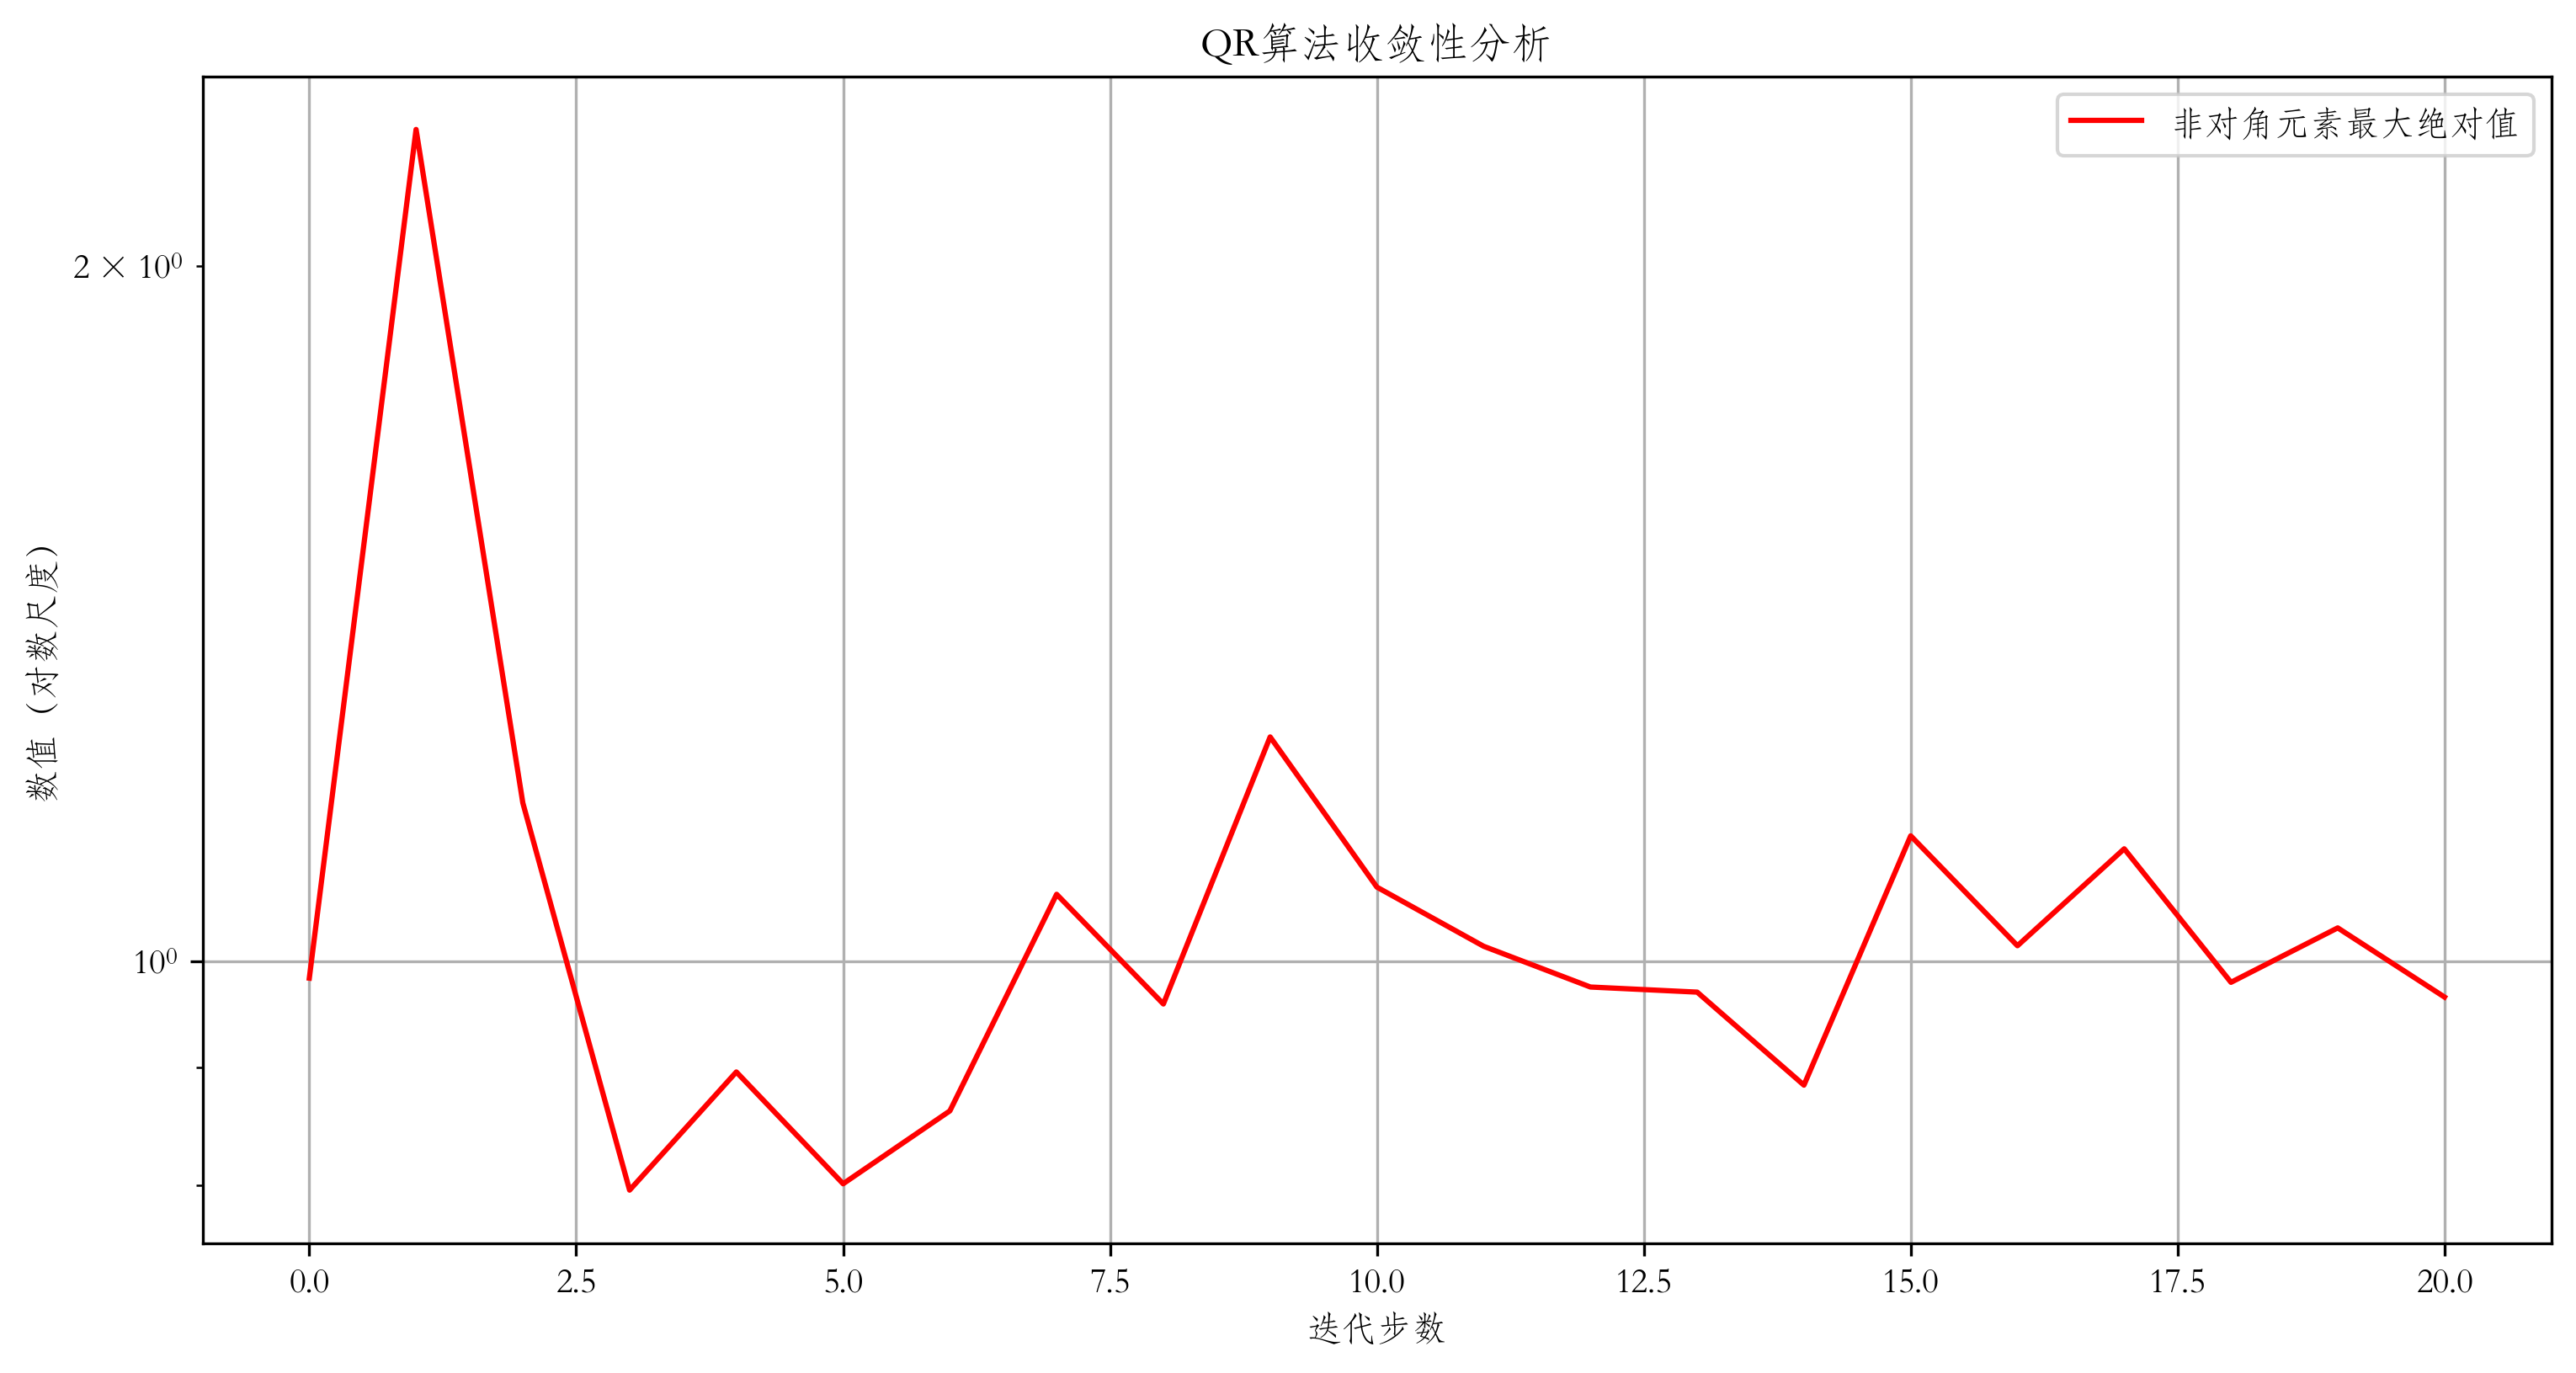


Numpy计算的特征值:
[ 5.27956189+0.j          0.59555688+0.28585816j  0.59555688-0.28585816j
 -0.86306481+0.j         -0.47090208+0.20751716j -0.47090208-0.20751716j
 -0.24002337+0.48583702j -0.24002337-0.48583702j  0.07393669+0.40468731j
  0.07393669-0.40468731j]

相对误差:
[-3.88578059e-16 -3.88578059e-16 -1.11022302e-15 -1.11022302e-15
  8.88178420e-16  8.88178420e-16  1.22124533e-15  1.22124533e-15
 -2.10942375e-15 -3.55271368e-15]


In [3]:
import numpy as np
from numpy.linalg import qr, eig
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['STFangsong']  # 图中显示中文
plt.rcParams['axes.unicode_minus'] = False  # 图中正常显示负号

def generate_random_matrix(n):
    """生成随机n阶矩阵"""
    return np.random.rand(n, n)

def shifted_qr(A, shift=0):
    """
    带位移的QR分解
    """
    n = A.shape[0]
    I = np.eye(n)
    Q, R = qr(A - shift * I)
    return R @ Q + shift * I

def shifted_qr_algorithm(A, steps, compute_each_step=False):
    """
    执行带位移的QR算法
    参数:
        A: 输入矩阵
        steps: 迭代步数
        compute_each_step: 是否记录每步结果
    返回:
        最终矩阵和(如果需要的话)每步的结果
    """
    A_k = A.copy()
    if compute_each_step:
        results = [A_k.copy()]
    
    for k in range(steps):
        # 使用Wilkinson位移
        n = A_k.shape[0]
        if n >= 2:
            a = A_k[n-2, n-2]
            b = A_k[n-2, n-1]
            c = A_k[n-1, n-1]
            d = (a + c) / 2
            shift = c + d - np.sign(d) * np.sqrt((a - c)**2 + b**2)
        else:
            shift = 0
            
        A_k = shifted_qr(A_k, shift)
        
        if compute_each_step:
            results.append(A_k.copy())
    
    if compute_each_step:
        return A_k, results
    return A_k

def analyze_matrix_properties(A_steps):
    """分析矩阵在迭代过程中的性质"""
    diagonal_elements = []
    off_diagonal_elements = []
    
    for A in A_steps:
        # 提取对角元
        diag = np.diag(A)
        diagonal_elements.append(np.abs(diag))
        
        # 提取非对角元
        off_diag = A - np.diag(diag)
        off_diagonal_elements.append(np.max(np.abs(off_diag)))
    
    return np.array(diagonal_elements), np.array(off_diagonal_elements)


# 1. 生成10阶随机矩阵
n = 10
A = generate_random_matrix(n)
print("原始随机矩阵A的特征值:")
print(np.linalg.eigvals(A))

# 2. 执行20步QR算法并记录每步结果
_, A_steps = shifted_qr_algorithm(A, 20, compute_each_step=True)

# 3. 分析10步和20步后的结果
print("\n10步后的矩阵特征值:")
print(np.linalg.eigvals(A_steps[10]))
print("\n20步后的矩阵特征值:")
print(np.linalg.eigvals(A_steps[20]))

# 4. 分析对角元和非对角元的变化
diag_elements, off_diag_elements = analyze_matrix_properties(A_steps)

# 5. 绘制收敛性分析图
plt.figure(figsize=(12, 6))
plt.semilogy(range(21), off_diag_elements, 'r-', label='非对角元素最大绝对值')
plt.grid(True)
plt.xlabel('迭代步数')
plt.ylabel('数值（对数尺度）')
plt.title('QR算法收敛性分析')
plt.legend()
plt.show()

# 6. 使用numpy的eig函数验证结果
eigenvalues_numpy = np.linalg.eigvals(A)
print("\nNumpy计算的特征值:")
print(eigenvalues_numpy)

# 7. 比较结果
qr_eigenvalues = np.linalg.eigvals(A_steps[-1])
print("\n相对误差:")
print(np.sort(np.abs(qr_eigenvalues)) - np.sort(np.abs(eigenvalues_numpy)))
